# Project: Titanic - Machine Learning from Disaster
![image.png](https://cdna.artstation.com/p/assets/images/images/029/747/394/large/vasilije-ristovic-titanic-sunset-print-prosirena-web.jpg?1598519694)

# Table of Contents
<ol>
    <li> <strong>Introduction </strong> </li>
    <li> <strong>Loading the Data </strong> </li>
    <li> <strong>Exploratory Data Analysis (EDA) </strong> </li>
</ol>

## 1. Introduction

## 2. Loading the Data

In [6]:
#Import Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
train_df=pd.read_csv("./data/train.csv")
test_df=pd.read_csv("./data/test.csv")

In [8]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
#Preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*PassengerID*
The first column is passengerID that is not really neccesary, so transfer it to index column. Use df.set_index method

In [13]:
train_df.set_index(train_df.PassengerId, inplace=True)

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_df.drop('PassengerId', axis=1, inplace=True)

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test_df=pd.read_csv('./data/test.csv', index_col='PassengerId')

In [16]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


<ul>
<li> <strong>Categorical </strong>: Survived , Sex , Embarked, Pclass (Ordinal), SibSp, Parch </li>
<li> <strong>Numerical</strong>: (Continuous) Age, Fare, (discrete) </li>
<li> <strong>Mix types of data </strong>: Ticket, Cabin</li>
<li> <strong>Contain Error/Typo</strong>: Name </li>
<li> <strong>Black or Null</strong>: Cabin > Age> Embarked </li>
<li> <strong>Various Data type</strong>: String, Int, Float</li>
</ul>

In [18]:
train_df['Survived']= train_df['Survived'].astype ('category')

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [20]:
features= ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
def convert_cat(df,features):
    for feature in features:
        df[feature]= df[feature].astype ('category')
convert_cat (train_df, features)
convert_cat (test_df, features)


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    category
 6   Parch        418 non-null    category
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(1), object(3)
memory usage: 22.8+ KB


## Distribution of Numerical feature values across the sample

In [23]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [24]:
test_df.describe()

,PassengerId,Age,Fare
count,418.000000,332.000000,417.000000
mean,1100.500000,30.272590,35.627188
std,120.810458,14.181209,55.907576
min,892.000000,0.170000,0.000000
25%,996.250000,21.000000,7.895800
50%,1100.500000,27.000000,14.454200
75%,1204.750000,39.000000,31.500000
max,1309.000000,76.000000,512.329200


## Distribution of Categorical feature values across the sample

In [25]:
train_df.describe(include='category')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [26]:
test_df.describe(include='category')

,Pclass,Sex,SibSp,Parch,Embarked
count,418,418,418,418,418
unique,3,2,7,8,3
top,3,male,0,0,S
freq,218,266,283,324,270


## 3. Exploratory Data Analysis (EDA)
### Corelating categorical feature
- Categorical: `Survived`, `Embarked`, `Sex`, `Pclass` (Ordinal), `SibSp`, `Parch` 
### 3.1. Target Variable: `Survived`


In [27]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [28]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Only 38% of passengers survived the Titanic disaster. Since there is no servere, I will not consider techniques such as sampling to address the training data imbalance. 
#### `Sex`

In [29]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


In [30]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


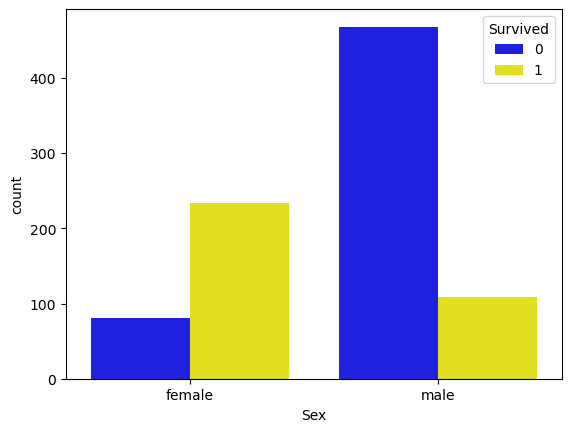

''

In [31]:
custom_palette = ['blue', 'yellow']
sns.countplot(data=train_df, x='Sex', hue='Survived',palette=custom_palette)
plt.show()
;

The Survival rate of Female is higher than Male
- Remaining Categorical Feature Column

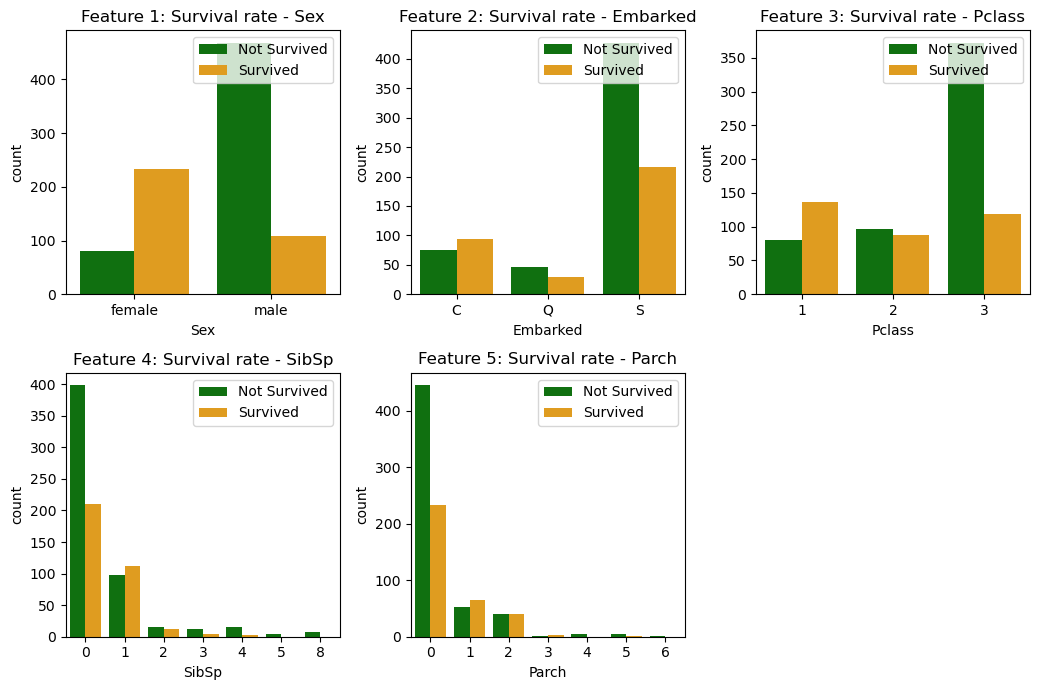

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3.5, n_rows * 3.5))
ax_flat = ax.flatten()  # Flatten the array of subplots

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c  # Index to loop through list 'Cols'
        if i < len(cols):
            ax_i = ax_flat[i]  # Access the correct flattened subplot
            custom_palette = ['green', 'orange']
            sns.countplot(data=train_df, x=cols[i], hue='Survived', palette=custom_palette, ax=ax_i)
            ax_i.set_title(f'Feature {i + 1}: Survival rate - {cols[i]}')
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

# Remove the last subplot
ax_flat[-1].set_visible(False)

plt.tight_layout()
plt.show()


#### Survival rate:
- Figure `Sex`: Female Survival rate is higher than Male
- Figure `Embarked`: The people who embarked on Southampton had the highest of not survived
- Fugure `Pclass`: The people at the first class had the highest survival rate
- Figure `SibSp`: Most people go with '0' `SibSp` are not survived. Passengers with 1-2 `SibSp` have better Survival rate
- Figure `Parch`: Passengers go with '0' `Parch` are highest survived

### 3.2. EDA for Numerical Features
- Numerical Features (continuous): `Age`, `Fare`
#### Age

<Axes: xlabel='Age', ylabel='Count'>

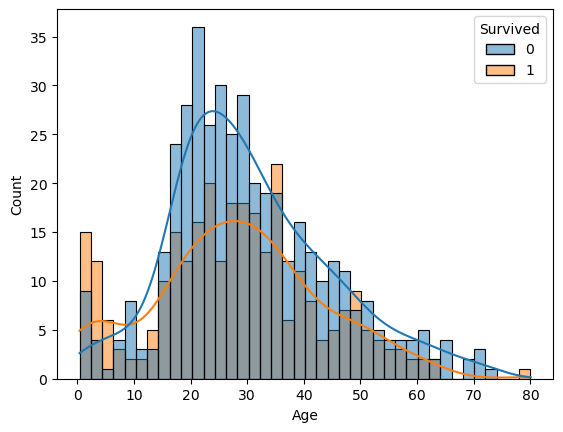

In [33]:
sns.histplot(data=train_df, x= 'Age', hue='Survived', bins=40, kde=True)

- Most of the passengers on board are 18-40 years old
- Children have a higher survival rate than other age groups
#### Fare


In [34]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

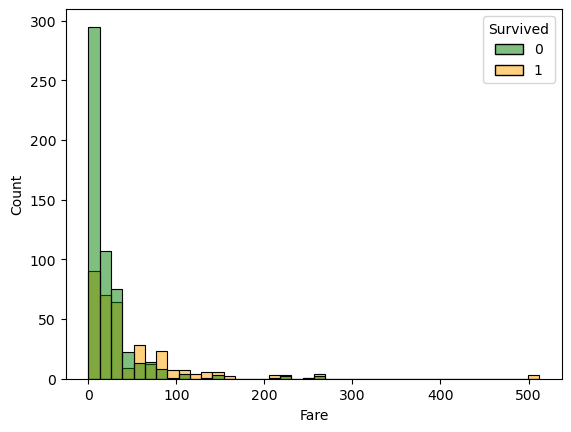

In [64]:
custom_palette= ['Green', 'Orange']
sns.histplot(data= train_df, x='Fare', hue='Survived', bins=40, palette= custom_palette);

                Fare Fare_Category
PassengerId                       
1             7.2500      Economic
2            71.2833        Luxury
3             7.9250      Standard
4            53.1000        Luxury
5             8.0500      Standard


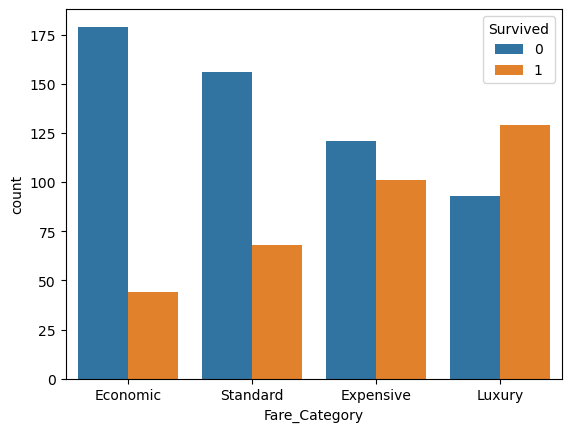

In [36]:
#To name for 0-25$ quartile, 25-50, 50-75, 75-100
import pandas as pd

# Create a list of names for each fare range
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']

# Use pd.qcut to split the data into 4 intervals based on quartiles and assign a name to each interval
train_df['Fare_Category'] = pd.qcut(train_df['Fare'], q=4, labels= fare_categories)

# Print partial data for testing
print(train_df[['Fare', 'Fare_Category']].head())

#Visual
sns.countplot(data=train_df, x='Fare_Category', hue='Survived')
plt.show()


In [37]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

- Distribution of Fare
   - Fares do not follow a normal distribution and have a large rise in the `0-$100` price range.
    - The distribution is biassed to the left, with `75$` of the fare paid under `31$` and a `512$` maximum paid fare.
- Quartile plot: 
     - Passenger with Luxury and Expensive Farre will have higher survival rate
    

### 4. Feature Engineering and Data Wragling
### 4.1. Feature Engineering
#### Name
- Regular Expression

In [38]:
train_df['Name'].tail()

PassengerId
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [74]:
def extract_title(name):
    p = re.compile(r", ([\w\s]+)\.")
    match = p.search(name)
    if match:
        return match.groups(1)[0].strip()
    else:
        return None

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))


In [66]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [41]:
test_df['Name']= test_df['Name'].apply(lambda name: extract_title(name))

In [42]:
test_df['Name'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64

In [75]:
def group_title(title):
    if title in ['Mr','Miss','Mrs','Master']:
        return title

    elif title == "Ms":
        return "Miss"
    
    else:
        return 'Others'
train_df['Title']= train_df['Title'].apply(lambda title: group_title (title))
test_df['Title']= test_df['Title'].apply(lambda title: group_title (title))

<Axes: xlabel='Title', ylabel='count'>

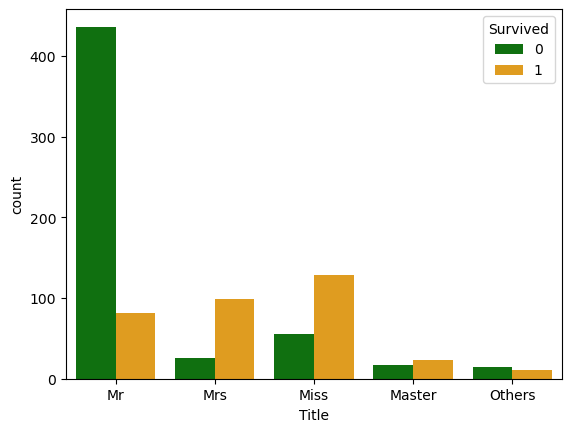

In [44]:
custom_palette= ['Green','Orange']
sns.countplot(data= train_df, x='Title', hue= 'Survived', palette= custom_palette)

### Family
- `SibSp`,`Parch`

In [45]:
train_df['Family_Size']=train_df['SibSp'].astype('int')+train_df['Parch'].astype('int')+1

In [46]:
test_df['Family_Size']=test_df['SibSp'].astype('int')+test_df['Parch'].astype('int')+1

In [61]:
train_df ['Family_cat']=pd.cut(train_df['Family_Size'], bins=[0,1, 4, 6, 20], labels= ['Solo','Small','Medium', 'Large'])  #(0,1],(1,4],(4,6], (6,20] 
test_df ['Family_cat']=pd.cut(test_df['Family_Size'], bins=[0,1, 4, 6, 20], labels= ['Solo','Small','Medium', 'Large'])  #(0,1],(1,4],(4,6], (6,20] 

<Axes: xlabel='Family_Size', ylabel='count'>

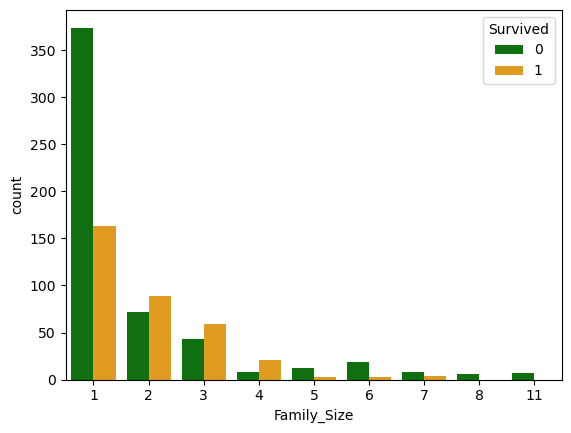

In [48]:

sns.countplot(data=train_df, x='Family_Size', hue= 'Survived', palette= custom_palette)

<Axes: xlabel='Family_cat', ylabel='count'>

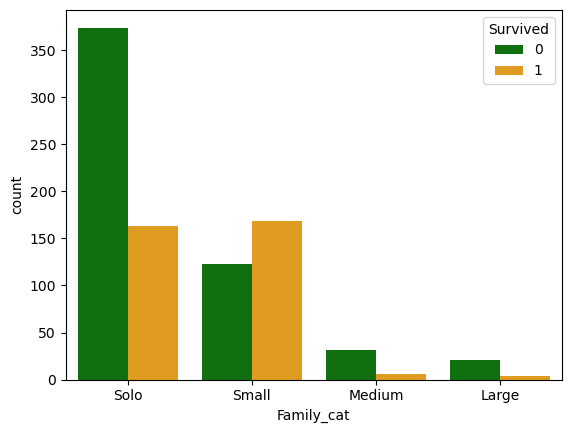

In [49]:
sns.countplot(data=train_df, x='Family_cat', hue= 'Survived', palette= custom_palette)

### 4.2.Data Wragling

In [69]:
num_features= ['Age', 'Fare']
cat_features= ['Sex','Pclass','Embarked','Title','Family_cat']
feature_cols=num_features+cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']


In [70]:
def display_missing(df, feature_cols):
    for col in feature_cols:
        missing_count=df[col].isnull().sum()
        if missing_count >0:
            print(f'col {col} has {missing_count} missing values.')
display_missing(train_df, feature_cols)

col Age has 177 missing values.
col Embarked has 2 missing values.


In [76]:
def display_missing(df, feature_cols):
    n_rows=df.shape[0]
    for col in feature_cols:
        missing_count=df[col].isnull().sum()
        if missing_count >0:
            print(f'col {col} has {missing_count*100/n_rows:.2f}% missing values.')
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

col Age has 19.87% missing values.
col Embarked has 0.22% missing values.
col Age has 20.57% missing values.
col Fare has 0.24% missing values.


### Fill missing values
#### Age
- Filling missing values with `median` of whole dataset
- Tim coi cot Age có tương đồng với những cootj nào khac trong data frame rồi fill các giá trị missing dựa theo bằng median group by ở cột nào đấy


In [79]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median(numeric_only=True)


In [81]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [94]:
# Filling the mising values in Age with the medians of Sex adn Pclass groups
train_df['Age'] = train_df['Age'].fillna(train_df.groupby(['Sex', 'Pclass'])['Age'].transform('median'))



In [95]:
test_df['Age'] = test_df['Age'].fillna(test_df.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

In [96]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

col Embarked has 0.22% missing values.
col Fare has 0.24% missing values.


In [97]:
x=train_df[feature_cols]
y=train_df['Survived']

In [98]:
x_test=test_df[feature_cols]

In [112]:
#preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
num_transformer=  Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [113]:
preprocessor= ColumnTransformer (transformers=[
    ('num',num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [114]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_cat'])])

In [115]:
x=preprocessor.transform(x) #x -> x_train, x_val(idation)

In [116]:
x_test= preprocessor.transform(x_test)

In [118]:
from sklearn.model_selection import train_test_split

In [120]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2)